In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
insurance_data=pd.read_csv('insurance.csv')

In [5]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_data.shape

(1338, 7)

In [10]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 600x600 with 0 Axes>

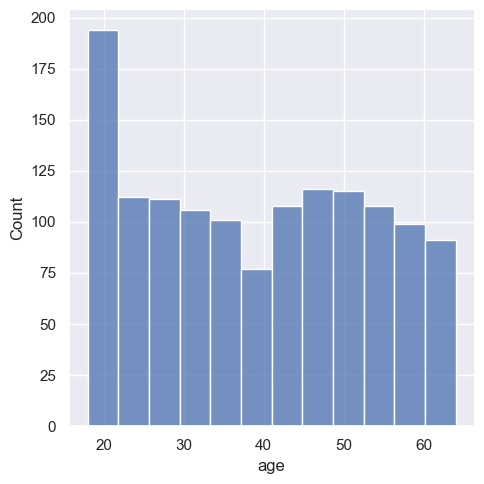

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.show()

<Figure size 600x600 with 0 Axes>

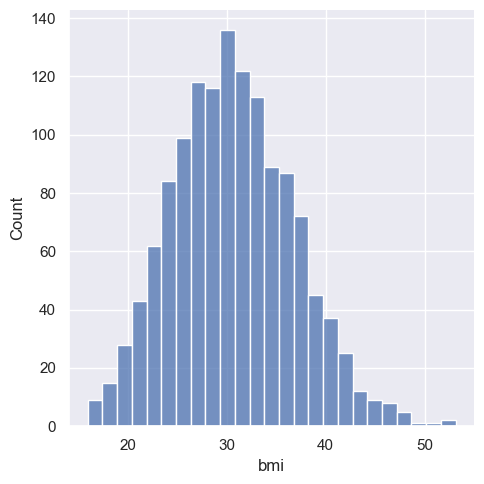

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.show()

<Figure size 600x600 with 0 Axes>

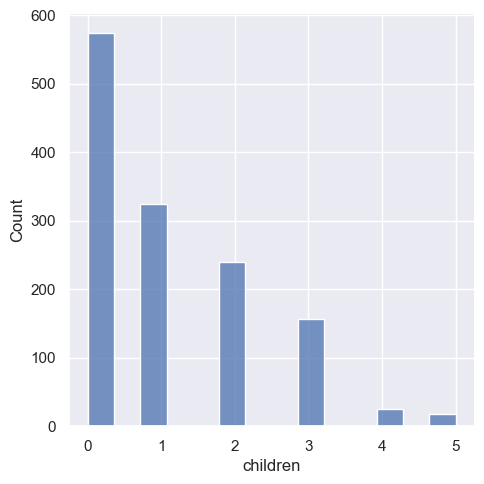

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['children'])
plt.show()

<Figure size 600x600 with 0 Axes>

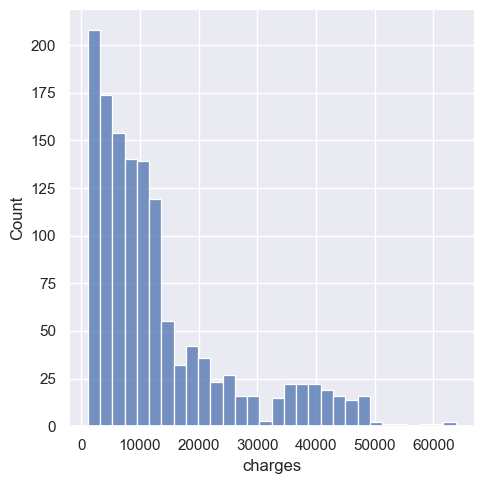

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.show()

In [15]:
insurance_data['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [16]:
insurance_data['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [17]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [18]:
insurance_data['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [19]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [21]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [22]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
#converting categorical columns into numerical 
# Replacing categorical values with numerical values
insurance_data.replace({'sex': {'female': 0, 'male': 1}}, inplace=True)
insurance_data.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
insurance_data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)


C:\Users\Rajasekher Sura\AppData\Local\Temp\ipykernel_6912\3832069687.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex': {'female': 0, 'male': 1}}, inplace=True)
C:\Users\Rajasekher Sura\AppData\Local\Temp\ipykernel_6912\3832069687.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\Rajasekher Sura\AppData\Local\Temp\ipykernel_6912\3832069687.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be

In [24]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [25]:
input_data = insurance_data.drop(columns='charges')
output_data=insurance_data['charges']

In [26]:
input_data

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [27]:
output_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
#splitiing data
input_train_data,input_test_data,output_train_data,output_test_data =train_test_split(input_data,output_data,test_size=0.2)

In [29]:
print(input_data.shape,input_train_data.shape,input_test_data.shape)

(1338, 6) (1070, 6) (268, 6)


In [30]:
print(output_data.shape,output_train_data.shape,output_test_data.shape)

(1338,) (1070,) (268,)


In [31]:
#creating model
model=RandomForestRegressor(n_estimators=100,max_depth=7)

In [32]:
model.fit(input_train_data,output_train_data)  #training model

RandomForestRegressor(max_depth=7)

In [33]:
#predicting values with test data
test_data_prediction=model.predict(input_test_data)

In [34]:
test_data_prediction

array([ 6648.30835827,  4147.6790136 , 47152.88636074, 14573.70438809,
       10168.01753146,  8287.67888612, 16939.38520807,  2161.76576151,
        8378.25691259, 11907.22659935,  2111.21378621, 14547.37154985,
        7306.42542852,  6466.68163166, 28341.17125829,  4862.43360135,
       11550.85386547,  4218.91921672, 38856.29513139, 14986.61464305,
       14327.72411769,  7419.81862828,  8901.54799181,  5458.57932265,
        2440.34180008,  2039.49030727, 24319.83369971, 44783.48844569,
       13968.90973189,  2363.15360172, 47565.14223628,  8276.85919229,
       14898.42821179, 11821.57144453,  7418.43972829,  2395.53456199,
        6150.82742093,  3401.47809767, 18637.86422144,  7027.48815111,
        3395.27641976, 36284.10031242,  7005.00519138,  4968.96579069,
       13396.29256012, 13976.26722818,  7459.88792501, 38457.09581249,
       46520.05917448, 11792.87700384, 13197.32920734, 44075.21105737,
       48325.90327258, 11197.60744585, 10385.30048625,  6280.8243626 ,
      

In [35]:
#evaluating model
from sklearn.metrics import r2_score

r2_score(test_data_prediction,output_test_data)

0.8243458552326474

In [36]:
input_data=(23,0,35,2,0,0)   #age , sex,bmi ,children ,smoker ,region
input_data_array=np.asarray(input_data)
input_data_array =input_data_array.reshape(1,-1)


In [37]:
model.predict(input_data_array)

c:\Users\Rajasekher Sura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4287.77304018])

In [38]:
insurance_premium =model.predict(input_data_array)

c:\Users\Rajasekher Sura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
insurance_premium[0]

4287.773040179321

In [40]:
import pickle as pkl

In [41]:
pkl.dump(model,open('MIPML.pkl','wb'))